In [3]:
import os
import numpy as np
import cv2
import pandas as pd
import matplotlib.pyplot as plt
from sklearn.model_selection import train_test_split
from sklearn.metrics import classification_report, accuracy_score
from tensorflow.keras.models import Sequential, load_model
from tensorflow.keras.layers import Conv2D, MaxPooling2D, Flatten, Dense, Dropout
from tensorflow.keras.utils import to_categorical
from tensorflow.keras.applications import MobileNetV2
from tensorflow.keras.applications.mobilenet_v2 import preprocess_input
from tensorflow.keras.preprocessing.image import img_to_array

In [4]:
img_size = 128
data_dir = "dataset"
categories = ['eczema', 'normal']
results = []
reports = {}

In [8]:
# 3. Veriyi Yukle ve Isleme
print("Veri yukleniyor...")
data = []
labels = []
for category in categories:
    path = os.path.join(data_dir, category)
    class_num = categories.index(category)
    for img_name in os.listdir(path):
        img_path = os.path.join(path, img_name)
        img = cv2.imread(img_path)
        if img is not None:
            img = cv2.resize(img, (img_size, img_size))
            data.append(img)
            labels.append(class_num)

data = np.array(data, dtype="float") / 255.0
labels = to_categorical(np.array(labels))

# Veriyi eğitim ve test olarak ayır
X_train, X_test, y_train, y_test = train_test_split(data, labels, test_size=0.2, random_state=42)


Veri yukleniyor...


In [6]:
# 4. Veriyi Ayir
X_train, X_test, y_train, y_test = train_test_split(data, labels, test_size=0.2, random_state=42)

In [15]:
# 5. Model 1: Basit CNN
model1 = Sequential([
    Conv2D(32, (3,3), activation='relu', input_shape=(img_size,img_size,3)),
    MaxPooling2D(2,2),
    Flatten(),
    Dense(64, activation='relu'),
    Dense(2, activation='softmax')
])
model1.compile(optimizer='adam', loss='categorical_crossentropy', metrics=['accuracy'])
model1.fit(X_train, y_train, epochs=10, validation_data=(X_test, y_test))
pred1 = np.argmax(model1.predict(X_test), axis=1)
true1 = np.argmax(y_test, axis=1)
acc1 = accuracy_score(true1, pred1)
results.append(["Model 1 - Simple CNN", acc1])
reports["Model 1 - Simple CNN"] = classification_report(true1, pred1, target_names=categories, output_dict=True)
model1.save("models/model1_simple_cnn.h5")

Epoch 1/10
79/79 [==============================] - 27s 324ms/step - loss: 0.2807 - accuracy: 0.9199 - val_loss: 0.3293 - val_accuracy: 0.8464
Epoch 2/10
79/79 [==============================] - 21s 272ms/step - loss: 0.0642 - accuracy: 0.9760 - val_loss: 0.0686 - val_accuracy: 0.9744
Epoch 3/10
79/79 [==============================] - 20s 258ms/step - loss: 0.0135 - accuracy: 0.9988 - val_loss: 0.0359 - val_accuracy: 0.9888
Epoch 4/10
79/79 [==============================] - 21s 268ms/step - loss: 0.0095 - accuracy: 0.9980 - val_loss: 0.0304 - val_accuracy: 0.9872
Epoch 5/10
79/79 [==============================] - 21s 270ms/step - loss: 0.0044 - accuracy: 0.9996 - val_loss: 0.0747 - val_accuracy: 0.9744
Epoch 6/10
79/79 [==============================] - 21s 261ms/step - loss: 0.0025 - accuracy: 0.9996 - val_loss: 0.0238 - val_accuracy: 0.9872
Epoch 7/10
79/79 [==============================] - 20s 254ms/step - loss: 0.0014 - accuracy: 1.0000 - val_loss: 0.0185 - val_accuracy: 0.9920

c:\Users\asus\AppData\Local\Programs\Python\Python38\lib\site-packages\keras\src\engine\training.py:3000: UserWarning: You are saving your model as an HDF5 file via `model.save()`. This file format is considered legacy. We recommend using instead the native Keras format, e.g. `model.save('my_model.keras')`.
  saving_api.save_model(


In [16]:
print("Model 1 doğruluk:", acc1)


Model 1 doğruluk: 0.9888


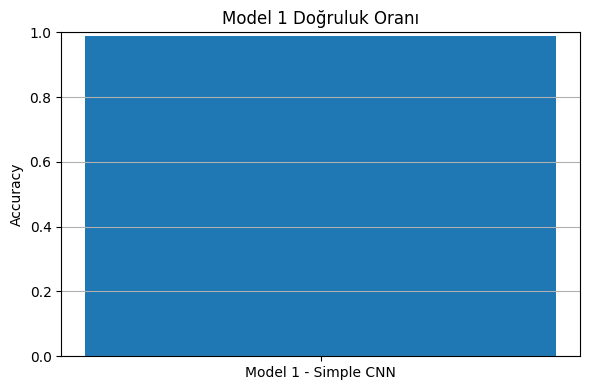

In [17]:
import matplotlib.pyplot as plt

# Model 1 doğruluk bilgisini örnek olarak kullanıyoruz
results = [["Model 1 - Simple CNN", acc1]]

# DataFrame ile tablo yap
import pandas as pd
df_results = pd.DataFrame(results, columns=["Model", "Accuracy"])

# Grafik oluştur
plt.figure(figsize=(6, 4))
plt.bar(df_results["Model"], df_results["Accuracy"])
plt.ylim(0, 1)
plt.title("Model 1 Doğruluk Oranı")
plt.ylabel("Accuracy")
plt.grid(axis='y')
plt.tight_layout()
plt.show()


In [18]:
# 6. Model 2: Daha Derin CNN
model2 = Sequential([
    Conv2D(32, (3,3), activation='relu', input_shape=(img_size,img_size,3)),
    MaxPooling2D(2,2),
    Conv2D(64, (3,3), activation='relu'),
    MaxPooling2D(2,2),
    Flatten(),
    Dense(128, activation='relu'),
    Dropout(0.5),
    Dense(2, activation='softmax')
])
model2.compile(optimizer='adam', loss='categorical_crossentropy', metrics=['accuracy'])
model2.fit(X_train, y_train, epochs=10, validation_data=(X_test, y_test))
pred2 = np.argmax(model2.predict(X_test), axis=1)
true2 = np.argmax(y_test, axis=1)
acc2 = accuracy_score(true2, pred2)
results.append(["Model 2 - Deep CNN", acc2])
reports["Model 2 - Deep CNN"] = classification_report(true2, pred2, target_names=categories, output_dict=True)
model2.save("models/model2_deep_cnn.h5")

Epoch 1/10
79/79 [==============================] - 39s 468ms/step - loss: 0.3416 - accuracy: 0.8779 - val_loss: 0.1017 - val_accuracy: 0.9600
Epoch 2/10
79/79 [==============================] - 32s 410ms/step - loss: 0.1208 - accuracy: 0.9556 - val_loss: 0.0984 - val_accuracy: 0.9568
Epoch 3/10
79/79 [==============================] - 32s 410ms/step - loss: 0.0883 - accuracy: 0.9680 - val_loss: 0.1650 - val_accuracy: 0.9264
Epoch 4/10
79/79 [==============================] - 32s 407ms/step - loss: 0.0662 - accuracy: 0.9764 - val_loss: 0.0613 - val_accuracy: 0.9808
Epoch 5/10
79/79 [==============================] - 32s 406ms/step - loss: 0.0652 - accuracy: 0.9776 - val_loss: 0.1045 - val_accuracy: 0.9584
Epoch 6/10
79/79 [==============================] - 34s 432ms/step - loss: 0.0332 - accuracy: 0.9872 - val_loss: 0.0478 - val_accuracy: 0.9792
Epoch 7/10
79/79 [==============================] - 33s 420ms/step - loss: 0.0329 - accuracy: 0.9868 - val_loss: 0.0772 - val_accuracy: 0.9728

c:\Users\asus\AppData\Local\Programs\Python\Python38\lib\site-packages\keras\src\engine\training.py:3000: UserWarning: You are saving your model as an HDF5 file via `model.save()`. This file format is considered legacy. We recommend using instead the native Keras format, e.g. `model.save('my_model.keras')`.
  saving_api.save_model(


In [19]:
print("Model 2 doğruluk:", acc2)

Model 2 doğruluk: 0.9728


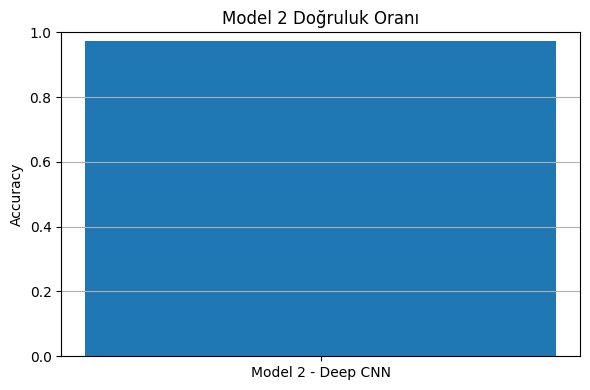

In [20]:
import matplotlib.pyplot as plt
import pandas as pd

# Örnek: sadece model 2'nin sonucu
results = [["Model 2 - Deep CNN", acc2]]
df_results = pd.DataFrame(results, columns=["Model", "Accuracy"])

plt.figure(figsize=(6, 4))
plt.bar(df_results["Model"], df_results["Accuracy"])
plt.ylim(0, 1)
plt.title("Model 2 Doğruluk Oranı")
plt.ylabel("Accuracy")
plt.grid(axis='y')
plt.tight_layout()
plt.show()


In [9]:
from tensorflow.keras.applications.mobilenet_v2 import MobileNetV2, preprocess_input
from tensorflow.keras.models import Sequential, load_model
from tensorflow.keras.layers import Dense, Dropout
from tensorflow.keras.callbacks import EarlyStopping
from tensorflow.keras.preprocessing.image import ImageDataGenerator
from sklearn.metrics import accuracy_score, classification_report
import numpy as np
import pandas as pd
import cv2

# Ayarlar
img_size = 128
categories = ['eczema', 'normal']
results = []
reports = {}

# 1. Eğitim verisini MobileNetV2 için hazırla
X_train_pre = preprocess_input(X_train * 255.0)
X_test_pre = preprocess_input(X_test * 255.0)

# 2. Veri Çeşitlendirme (Augmentation)
datagen = ImageDataGenerator(
    rotation_range=20,
    zoom_range=0.2,
    width_shift_range=0.1,
    height_shift_range=0.1,
    horizontal_flip=True,
    fill_mode='nearest'
)
datagen.fit(X_train_pre)

# 3. Modeli oluştur
base_model = MobileNetV2(include_top=False, input_shape=(img_size, img_size, 3), pooling='avg', weights='imagenet')
base_model.trainable = False

model3 = Sequential([
    base_model,
    Dense(128, activation='relu'),
    Dropout(0.5),
    Dense(2, activation='softmax')
])

# 4. Derle
model3.compile(optimizer='adam', loss='categorical_crossentropy', metrics=['accuracy'])

# 5. EarlyStopping tanımla
early_stop = EarlyStopping(monitor='val_loss', patience=5, restore_best_weights=True)

# 6. Eğit (augmentation ile)
model3.fit(
    datagen.flow(X_train_pre, y_train, batch_size=32),
    epochs=50,
    validation_data=(X_test_pre, y_test),
    callbacks=[early_stop]
)

# 7. Tahmin yap
pred3 = np.argmax(model3.predict(X_test_pre), axis=1)
true3 = np.argmax(y_test, axis=1)
acc3 = accuracy_score(true3, pred3)

# 8. Raporla ve kaydet
results.append(["Model 3 - MobileNetV2 (augmented)", acc3])
reports["Model 3 - MobileNetV2 (augmented)"] = classification_report(true3, pred3, target_names=categories, output_dict=True)

df_results = pd.DataFrame(results, columns=["Model", "Accuracy"])
df_results.to_csv("results/model_performance.csv", index=False)

report_df = pd.DataFrame()
for model_name, report in reports.items():
    temp_df = pd.DataFrame(report).T
    temp_df["Model"] = model_name
    report_df = pd.concat([report_df, temp_df])
report_df.to_csv("results/classification_reports.csv")

# 9. Modeli kaydet
model3.save("models/model3_mobilenetv2.h5")
print("Model başarıyla eğitimle ve veri artırımı ile kaydedildi.")
print(df_results)


Epoch 1/50
79/79 [==============================] - 28s 319ms/step - loss: 0.1267 - accuracy: 0.9509 - val_loss: 0.0690 - val_accuracy: 0.9778
Epoch 2/50
79/79 [==============================] - 25s 311ms/step - loss: 0.0378 - accuracy: 0.9861 - val_loss: 0.0555 - val_accuracy: 0.9810
Epoch 3/50
79/79 [==============================] - 24s 304ms/step - loss: 0.0430 - accuracy: 0.9818 - val_loss: 0.0574 - val_accuracy: 0.9810
Epoch 4/50
79/79 [==============================] - 24s 303ms/step - loss: 0.0366 - accuracy: 0.9869 - val_loss: 0.0447 - val_accuracy: 0.9873
Epoch 5/50
79/79 [==============================] - 24s 310ms/step - loss: 0.0185 - accuracy: 0.9941 - val_loss: 0.0603 - val_accuracy: 0.9778
Epoch 6/50
79/79 [==============================] - 23s 296ms/step - loss: 0.0231 - accuracy: 0.9913 - val_loss: 0.0512 - val_accuracy: 0.9842
Epoch 7/50
79/79 [==============================] - 24s 300ms/step - loss: 0.0244 - accuracy: 0.9901 - val_loss: 0.0410 - val_accuracy: 0.9921

c:\Users\asus\AppData\Local\Programs\Python\Python38\lib\site-packages\keras\src\engine\training.py:3000: UserWarning: You are saving your model as an HDF5 file via `model.save()`. This file format is considered legacy. We recommend using instead the native Keras format, e.g. `model.save('my_model.keras')`.
  saving_api.save_model(


In [26]:
model3.save("models/model3_mobilenetv2.h5")


In [10]:
print("Model 3 doğruluk:", acc3)

Model 3 doğruluk: 0.9920886075949367


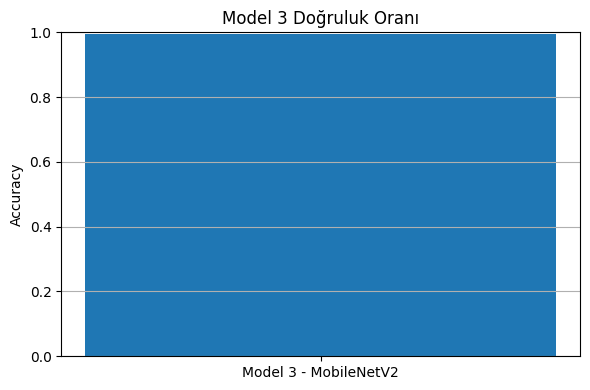

In [23]:
import matplotlib.pyplot as plt
import pandas as pd

# Model 3 doğruluğu zaten hesaplandı: acc3
results = [["Model 3 - MobileNetV2", acc3]]
df_results = pd.DataFrame(results, columns=["Model", "Accuracy"])

# Grafik çiz
plt.figure(figsize=(6, 4))
plt.bar(df_results["Model"], df_results["Accuracy"])
plt.ylim(0, 1)
plt.title("Model 3 Doğruluk Oranı")
plt.ylabel("Accuracy")
plt.grid(axis='y')
plt.tight_layout()
plt.show()


In [24]:
# 8. En Iyi Modeli Sec ve Kaydet
df_results = pd.DataFrame(results, columns=["Model", "Accuracy"])
df_results.to_csv("results/model_performance.csv", index=False)
report_df = pd.DataFrame()
for model_name, report in reports.items():
    temp_df = pd.DataFrame(report).T
    temp_df["Model"] = model_name
    report_df = pd.concat([report_df, temp_df])
report_df.to_csv("results/classification_reports.csv")

best_model_index = df_results["Accuracy"].idxmax()
best_model_name = df_results.iloc[best_model_index, 0]
best_model_path = f"models/model{best_model_index+1}_" + best_model_name.split(" - ")[1].lower().replace(" ", "") + ".h5"
print(f"En iyi model: {best_model_name} -> {best_model_path}")

En iyi model: Model 3 - MobileNetV2 -> models/model1_mobilenetv2.h5
